# Clasificación K-NN

Mateo Rosero

## Explicaciones Clave
**Sobre el dataset:** ``iphone_purchase_records.csv`` contiene datos para determinar si una persona compra un teléfono iPhone o no (Purchase Iphone) según dos variables independientes:
- Age --> Edad de la persona
- Salary --> Ingreso anual de la persona

**Entrenamiento del modelo:** Se utilizará la librería de ``skearn`` para poder implementar el algoritmo de Clasificación K-NN.

# Importar Librerías Necesarias

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib.colors import ListedColormap

# Importar el Dataset

In [43]:
dataset = pd.read_csv('iphone_purchase_records.csv')

# Definición de Variable Independiente y Dependiente

In [44]:
X = dataset[['Age', 'Salary']].values
y = dataset['Purchase Iphone'].values

En este dataset, la compra de un teléfono iPhone está dada por la edad de la persona y su salario. Por esta razón, esta variable cualitativa dicotómica es la variable dependiente y las demás variables numéricas son variables independientes.

# División entre Conjunto de Entrenamiento y Conjunto de Prueba

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de Características (Feature Scaling)

In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Evaluación de distintos valores de k

In [47]:
accuracies = []
k_values = range(1, 16)

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

## Visualización del accuracy en función de k

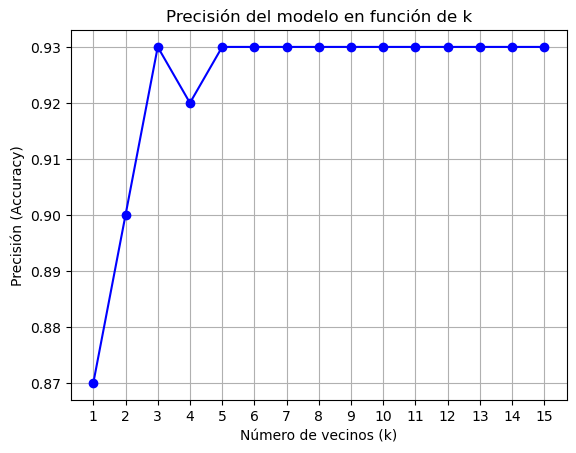

In [48]:
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Precisión del modelo en función de k')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión (Accuracy)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Mostrar el mejor k y su precisión

In [49]:
mejor_k = k_values[np.argmax(accuracies)]
mejor_accuracy = max(accuracies)
print(f"Mejor valor de k: {mejor_k} con una precisión de {mejor_accuracy:.2f}")

Mejor valor de k: 3 con una precisión de 0.93


Tras este algoritmo y gráfica para determinar el mejor valor, se ha escogido ```k = 3``` para evitar tanto el **~Subajuste~** como el **~Sobreajuste~**. 

# Entrenando el Modelo K-NN sobre el Conjunto de Entrenamiento

In [50]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Predicciones

## Sobre un nuevo resultado

**Ejemplo:** Persona de 30 años con un salario de $87.000 anuales.

In [51]:
resultado = classifier.predict(sc.transform([[30, 87000]]))
print(f"Predicción para edad 30 y salario 87000: {resultado}")

Predicción para edad 30 y salario 87000: [0]


## Sobre el Conjunto de Prueba

In [52]:
y_pred = classifier.predict(X_test)

# ANÁLISIS

# Matriz de Confusión

La matriz de confusión nos permite visualizar los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.  Se evalúa comparando las predicciones con los valores reales
- Un buen modelo tendrá valores altos en la diagonal principal..

In [53]:
print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Matriz de Confusión:
[[64  4]
 [ 3 29]]


Esta matriz tiene lo siguiente:
- 64 verdaderos negativos (personas que no compraron y el modelo acertó).
- 29 verdaderos positivos (personas que compraron y el modelo acertó).
- 4 falsos positivos (personas que no compraron, pero el modelo predijo que sí).
- 3 falsos negativos (personas que sí compraron, pero el modelo predijo que no). <br>
Por lo tanto, se puede decir que **_el modelo comete pocos errores_**, con solo 7 clasificaciones incorrectas por sobre las 100 muestras.

# Accuracy

Mide el porcentaje de predicciones correctas del modelo sobre el total de los casos.

In [54]:
print("Precisión global (Accuracy):")
print(accuracy_score(y_test, y_pred))

Precisión global (Accuracy):
0.93


Tras la ejecución del código, se puede decir que el modelo acierta en el **_93%_** de los casos, lo que indica que **_el modelo es confiable en sus predicciones_**.

# Precision

Otorga un resultado en el que indica, de todas las veces que el modelo dio un resultado positivo, ¿Cuántas veces acertó?<br>
Su interpretación se realiza de la siguiente manera:
- **Precision alta (> 0.7):** El modelo tiene un _**bajo número de falsos positivos**_. Es decir, cuando predice que algo es positivo, generalmente tiene razón.
- **Precision baja (< 0.5):** El modelo está haciendo _**muchos falsos positivos**_. En estos casos, el modelo tiende a etiquetar incorrectamente como positivos muchos ejemplos negativos, lo que puede ser un problema si la consecuencia de un falso positivo es costosa, como los casos de arrestar a una persona inocente o diagnosticar erróneamente una enfermedad.

In [55]:
print("Precisión (Precision):")
print(precision_score(y_test, y_pred))

Precisión (Precision):
0.8787878787878788


De todas las predicciones positivas, es decir, las personas que compraron el teléfono iPhone, _**el 87.9% realmente lo compraron**_.

# Recall (Sensibilidad)

Métrica que indica, de todos los resultados que sí eran positivos, ¿Cuántos se detectaron?<br>
Su interpretación es la siguiente:
- **Recall alto (> 0.7):** El modelo es _**bueno para detectar casos positivos**_. Es decir, tiene una baja tasa de falsos negativos, lo que es crucial cuando un falso negativo es muy costoso.
- **Recall bajo (< 0.5):** El modelo está _**pasando por alto muchos casos positivos**_, lo cual puede ser peligroso en contextos donde no detectar algo realmente importante podría tener consecuencias graves, como no detectar una enfermedad o no detectar un fraude.

In [57]:
recall = recall_score(y_test, y_pred)
print("Recall (Sensibilidad):")
print(recall)

Recall (Sensibilidad):
0.90625


Tras el análisis, se concluye que _**el modelo identifica correctamente al 90.6% de los compradores reales**_. 

# F1 Score

Es un promedio armónico entre _Precision_ y _Recall_ con el objetivo de balancear ambas métricas.<br>
Su evaluación se realiza así:
- **F1-Score alto (> 0.7):** El modelo tiene un buen balance entre precision y recall. Es ideal en situaciones donde quieres equilibrar ambas métricas y no quieres que el modelo se incline demasiado hacia un lado (precision o recall).
- **F1-Score bajo (< 0.5):** Esto indica que el modelo tiene un equilibrio pobre entre precision y recall, lo que generalmente significa que está fallando en al menos una de las dos métricas. Esto es un indicio de que el modelo no está funcionando bien en general.

In [59]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:")
print(f1)

F1-Score:
0.8923076923076922


A nivel global en el modelo, este tiene un rendimiento del _**89,2%**_, lo que indica un _**buen balance entre las métricas de precisión y recall**_.

# Curva ROC y Área bajo la Curva ROC (AUC)

Por un lado, la Curva ROC (_Receiver Operating Characteristic_), es una gráfica que muestra cómo cambia el modelo si se ajusta el umbral de clasificación, teniendo al eje X como la Tasa de Falsos Positivos (FPR) y al eje Y como la Tasa de Verdaderos Positivos (TPR). Una curva más cerca de la esquina superior izquierda indica que es un mejor modelo.<br>
Generalmente, si hay una _**curva cerca de la esquina superior izquierda**_, el modelo tiene una alta capacidad de discriminación, lo que significa que es muy bueno para separar las clases (Cuanto más hacia la esquina superior izquierda, mejor), y cuando hay una **_curva cerca de la diagonal (línea punteada)_**, esto indica un modelo que tiene un rendimiento similar al azar (AUC cercano a 0.5), por lo que no está discriminando bien las clases.

Por otro lado, la Área bajo la curva ROC (_AUC_) resume la ROC con un número entre 0 y 1. Mientras más cercano a 1, mejor el modelo distingue entre las clases. <br>
Se interpreta de la siguiente forma:
- **AUC alto (> 0.8):** El modelo tiene una excelente capacidad para separar las clases. Cuanto más cerca de 1, mejor.
- **AUC cercano a 0.5:** El modelo es prácticamente aleatorio y no tiene capacidad de discriminación.
- **AUC bajo (< 0.6):** El modelo tiene una muy baja capacidad de discriminación y probablemente no sea útil.

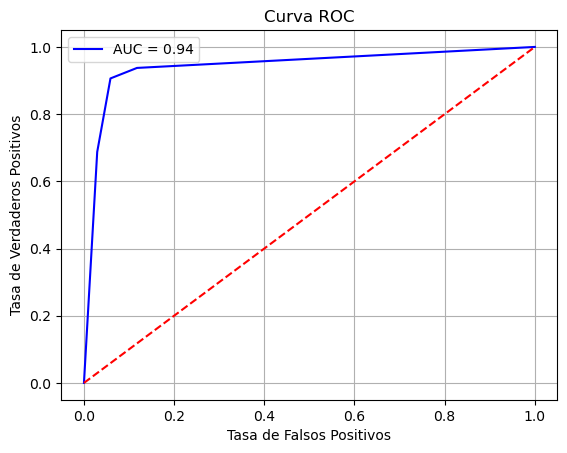

Área bajo la curva (AUC):
0.9425551470588235


In [60]:
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()
print("Área bajo la curva (AUC):")
print(auc)

Estas métricas nos indican lo siguiente:
- Gráficamente, la curva tiene una forma óptima, en la que se encuentra _**más cerca a la esquina superior izquierda**_, indicando que hay una **_buena capacidad de discriminación entre compradores y no compradores_**.
- A nivel estadístico, el AUC, al tener un valor del _**0.94**_, _**refuerza esta conclusión sobre la buena capacidad de discriminación del modelo**_, pues se encuentra en el rango de un valor mayor a 0.8.